# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables (Feature Variables):

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

In [161]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [162]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In the above dataset there is 614 rows and 13 columns.

From the above dataset we find that the problem statement has two classes Yes and No so it is a "Classification problem".

In [163]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


It shows the first 5 colummns of the data.

In [164]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


It shows the last 5 columns of the dataset 

In [165]:
df.shape

(614, 13)

It describe the dimension of dataset which contains 614 columns and 13 rows 

In [166]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In the above dataset we have object, float and int type columns in the data.

Further the Dtype of the dataset is object

In [167]:
category_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_columns.append(i)
print(category_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


This method shows the lists of category columns in the dataset

In [168]:
number_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number_column.append(i)
print(number_column)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


This method shows the lists of numerical columns in the dataset.

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This method shows the good overview of the dataset.

In the above dataset there is some missing values present in the different columns of the data.

The dataset consist the object,float and int type

The memory usage of the dataset is 62.5+ KB.


In [170]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

This method shows the number of unique values present in each columns of the dataset.


In [171]:
for i in df.columns:
        print(df[i].value_counts())
        print('-----------------')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------
Male      489
Female    112
Name: Gender, dtype: int64
-----------------
Yes    398
No     213
Name: Married, dtype: int64
-----------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
-----------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
-----------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
-------------

In [172]:
df.drop("Loan_ID",axis=1,inplace=True)

Dropping the unwanted column in the dataset

In [173]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


After removing the columns we have 614 rows and 12 columns in the above dataset

In [174]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In the above dataset checking null values in the columns.

In the above dataset we have null values present in columns accept Education,CoapplicantIncome,ApplicantIncome,Property_Area and Loan_Status  


<AxesSubplot:>

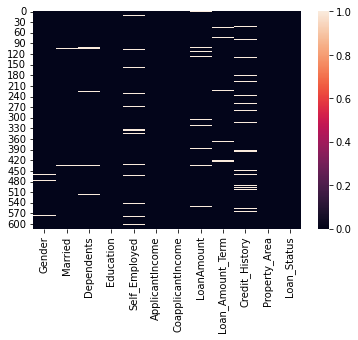

In [175]:
sns.heatmap(df.isnull())

From this method we visualize the null values clearly

In the above dataset null values are present in some columns

In [176]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In the above dataset we find the skewness in some columns 

In [177]:
print("The mode of Gender is:",df["Gender"].mode())  
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64


In [178]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [179]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

This method shows the sum of null values present in different columns 

In [180]:
print("The median of Loan Amount is:", df["LoanAmount"].median())

The median of Loan Amount is: 128.0


This method shows the median values of the numerical columns

In [181]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [182]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In the above column we have no null values present in the dataset

<AxesSubplot:>

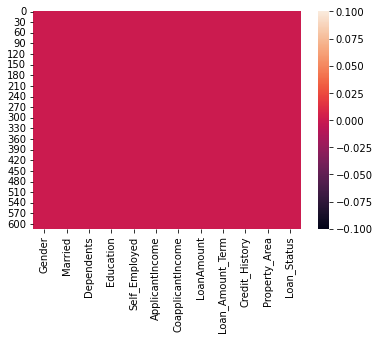

In [183]:
sns.heatmap(df.isnull())


This method visualize the null values clearly.

Further in the dataset there is no null values present in the data as the dataset is clean

In [184]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

This method shows the columns present in the dataset

In [185]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

Checking the unique value of target column

In [186]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Checking the list of counts in target columns.

In the above dataset we have two counts in Loan_Status "Y"(yes) and "N"(no).Yes means loan of the applicant is approved and no means that the loan of the applicant is not approved.

Further in the dataset loan approved has high counts.


In [187]:
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In the above dataset it does not contains any space

In [188]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


It describe the statistical summary of dataset.

The summary of this dataset looks perfect since there is no negative/ invalid values present.

It gives the summary of numerical data.

The counts of all the columns are same which means there are no null values present in the dataset.

The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.

There is vvery much gap between mean and the standard deviation.

Further there is a huge difference in max and 75% percentile which means there is outliers present in the dataset.



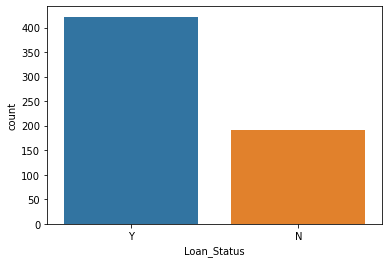

In [189]:
sns.countplot(df["Loan_Status"])
plt.show()


In the above plot we see the number of yes count is more than no count in target variable.

Further we see the huge  difference in the yes and no column, which means our target column is imbalanced 

Male      502
Female    112
Name: Gender, dtype: int64


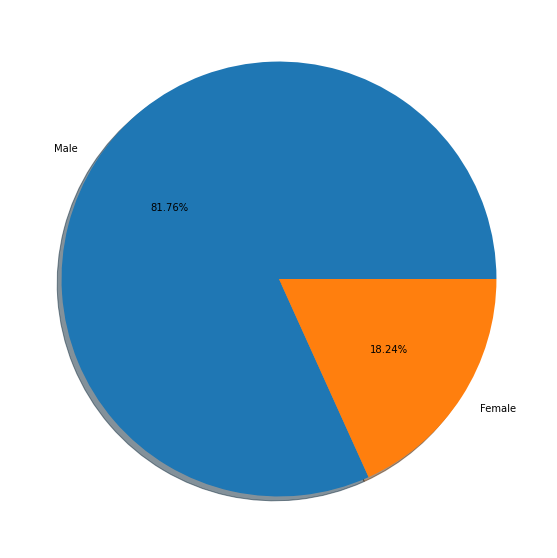

In [190]:
labels='Male','Female'
fig, ax = plt.subplots(figsize=(12,10))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
print(df["Gender"].value_counts())
plt.show()

In the above pie chart there is more number of male than female who apply for loan.


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


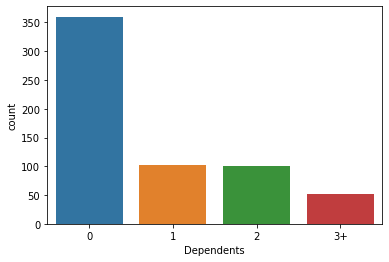

In [191]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


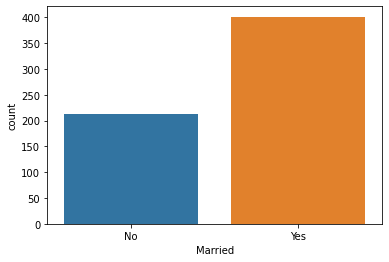

In [192]:
sns.countplot(df["Married"])
print(df["Married"].value_counts())
plt.show()

In the above plot the number of Married applicants who are applying for loan is high than Unmarried applicants

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


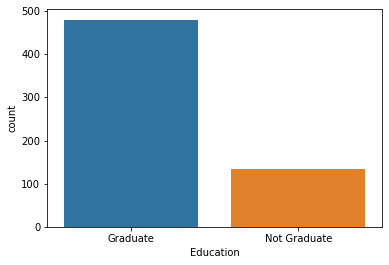

In [193]:
sns.countplot(df["Education"])
print(df["Education"].value_counts())
plt.show()

In the above plot there is more graduate than not graduate who apply for loan

In [194]:
sns.countplot(df["Self_Employed"])
print(df["Self_Employed"].value_counts())plt.show()

SyntaxError: invalid syntax (2980533178.py, line 2)

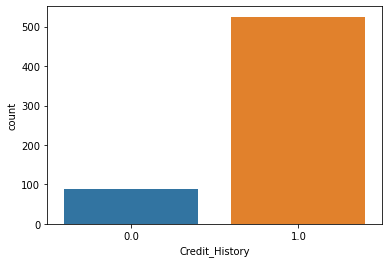

In [195]:
sns.countplot(df["Credit_History"])
plt.show()

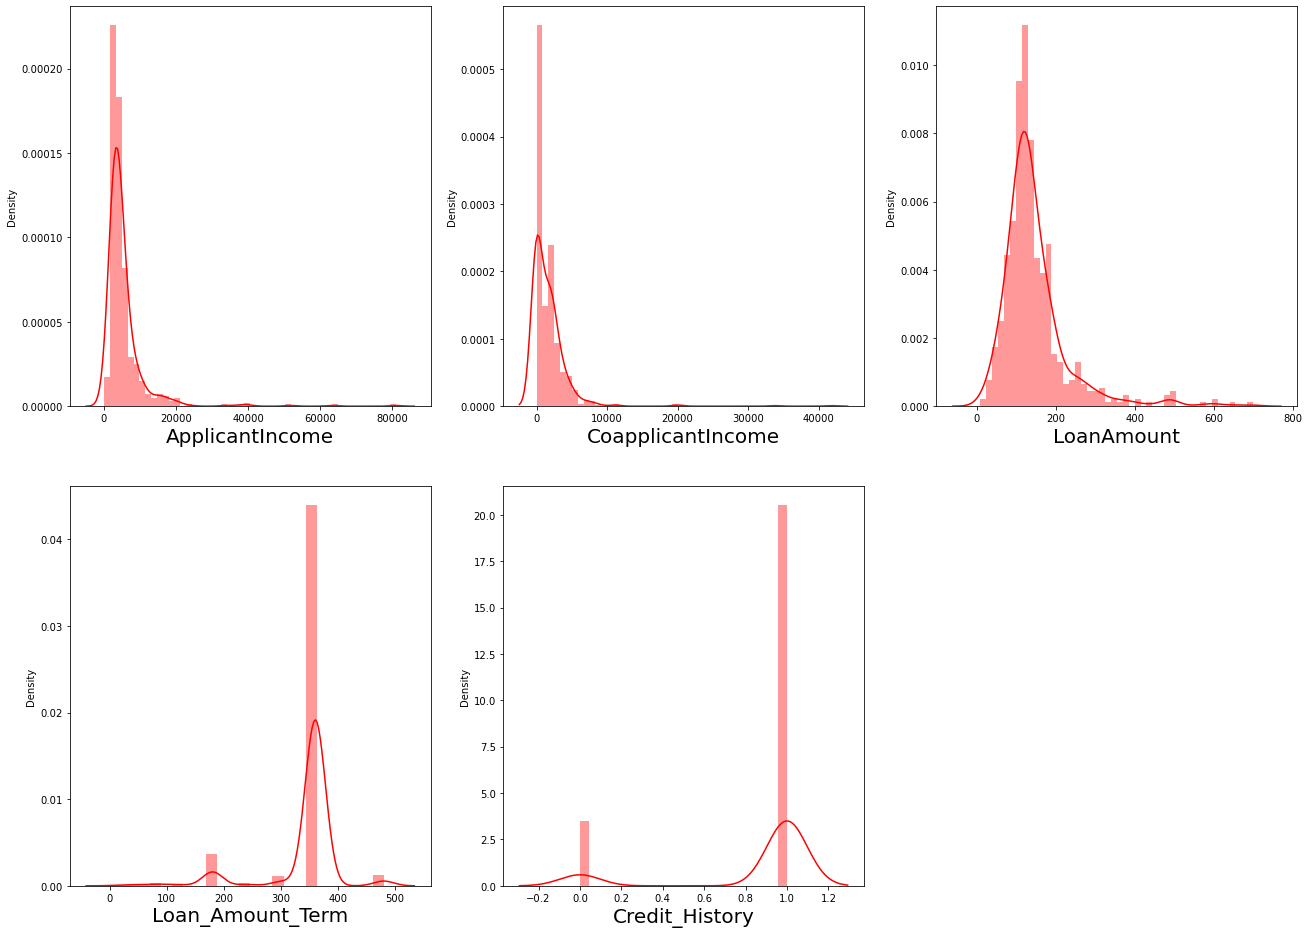

In [196]:
plt.figure(figsize=(22,25),facecolor='white')
plotnumber=1
for column in number_column:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In the above plot data is not distributed in any of the columns.

In the above plot skewness is present in all the numerical columns 

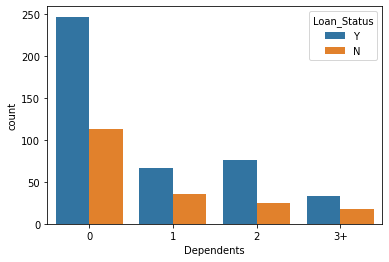

In [197]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

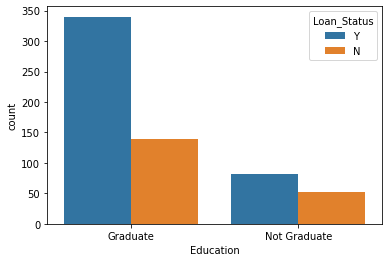

In [198]:
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

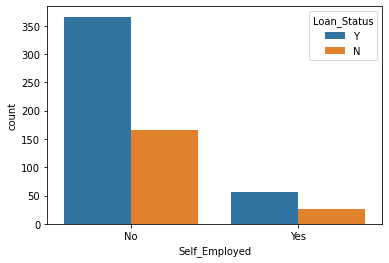

In [199]:
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

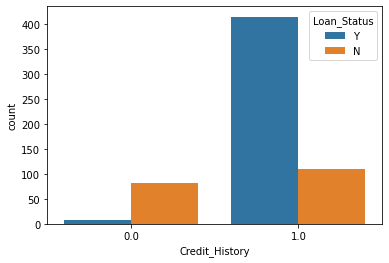

In [200]:
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

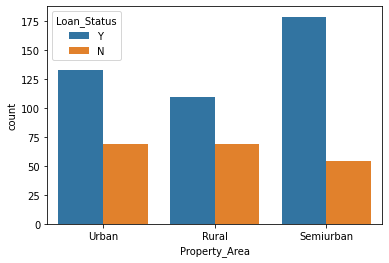

In [201]:
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

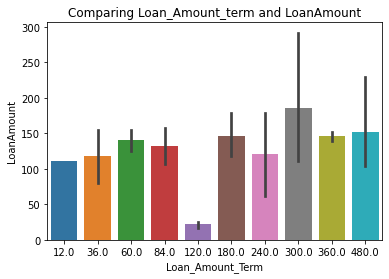

In [202]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

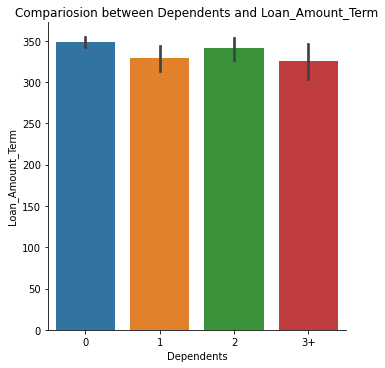

In [203]:
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Compariosion between Dependents and Loan_Amount_Term")
plt.show()

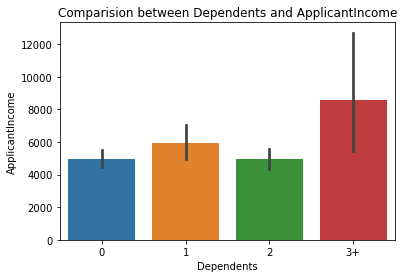

In [204]:
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

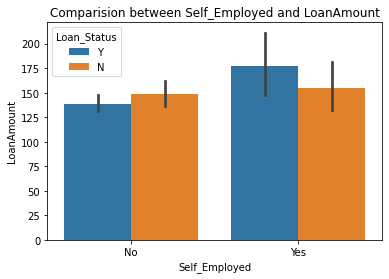

In [205]:
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

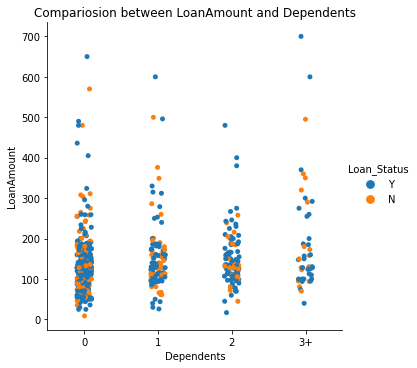

In [206]:
sns.catplot(x='Dependents',y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Compariosion between LoanAmount and Dependents")
plt.show()

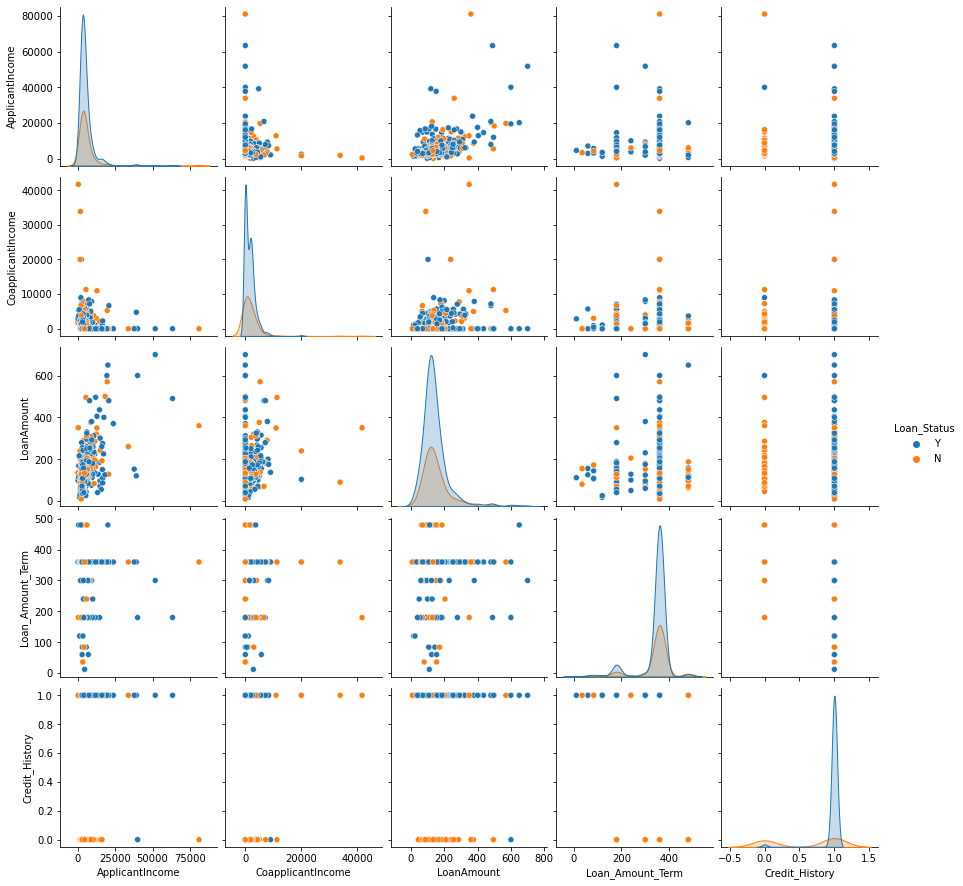

In [207]:
sns.pairplot(df,hue="Loan_Status")

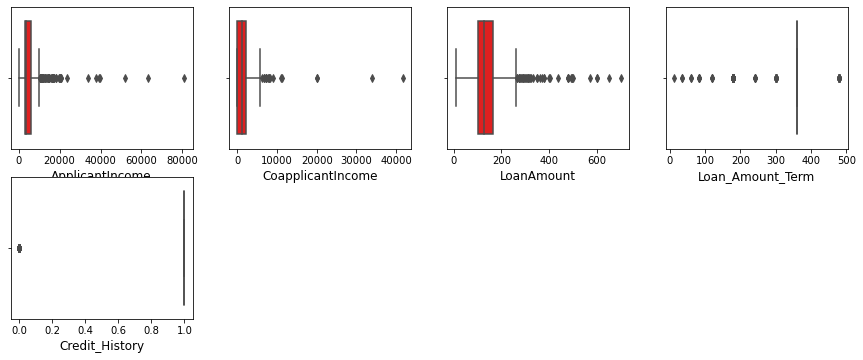

In [208]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber=1
for column in number_column:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

In the above plots we observe the outliers present in all the numerical columns.



In [209]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [210]:
outliers=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

from scipy.stats import zscore

z=np.abs(zscore(outliers))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In the above method we have removed the outliers

In [211]:
new_dataset = df[(z<3).all(axis=1)] 
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In the above column after removing the outliers through zscore method, we have now 577 rows and 12 columns as the new dataset

In [212]:
df.shape

(614, 12)

In the above column it shows the shape of original dataset.
Before removing the outliers we had 614 rows and 12 columns.


In [213]:
new_dataset.shape

(577, 12)

In the above columns after removing the outliers we have 577 rows and 12 columns.



In [214]:
loss_data = (614-577)/614*100
loss_data

6.026058631921824

In the above column we have loss 6.02% of data by zscore method

In [215]:
Q1=outliers.quantile(0.25)

Q3=outliers.quantile(0.75)

IQR=Q3 - Q1

new_dataset=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [216]:
new_dataset.shape

(459, 12)

In the above column after removing the outliers through IQR method, we have now 459 rows and 12 columns as the new dataset

In [217]:
loss_data = (614-459)/614*100
loss_data

25.2442996742671

In the abvoe IQR method I am losing 25% of data.

In [218]:
new_dataset.skew()

ApplicantIncome      1.115387
CoapplicantIncome    0.808908
LoanAmount           0.528983
Loan_Amount_Term     0.000000
Credit_History      -2.115189
dtype: float64

In the above column skewness present in all the columns accpet Loan_Amount_Term 

In [219]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [220]:
new_dataset[skew] = scaler.fit_transform(new_dataset[skew].values)
new_dataset[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1.039196,-1.159099,0.051225
1,0.437965,0.725364,0.051225
2,-0.496672,-1.159099,-1.505642
3,-0.796361,0.893359,-0.131315
4,1.104901,-1.159099,0.339412


In [221]:
new_dataset.skew()

ApplicantIncome      0.079590
CoapplicantIncome   -0.256099
LoanAmount           0.051913
Loan_Amount_Term     0.000000
Credit_History      -2.115189
dtype: float64

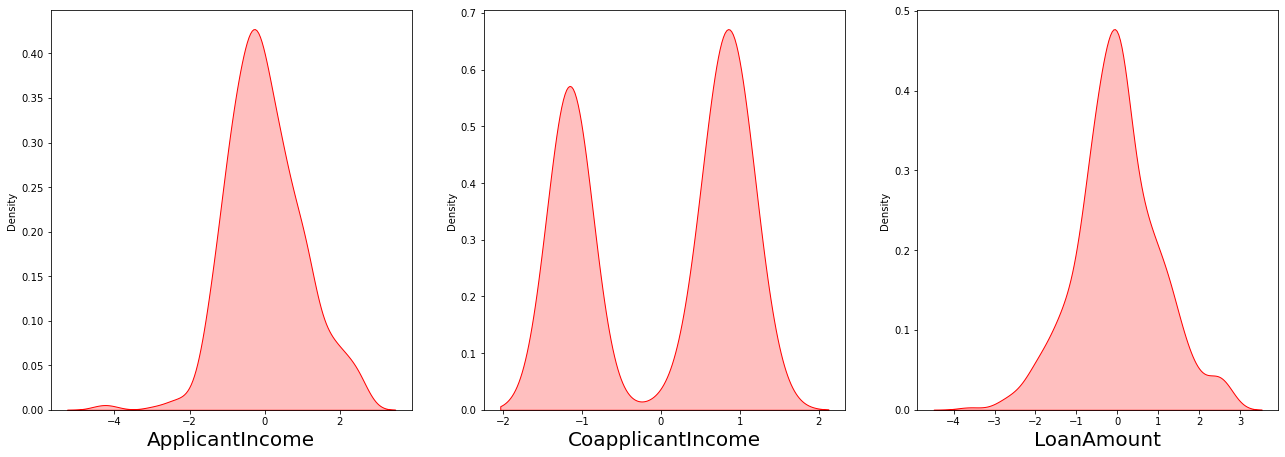

In [222]:
plt.figure(figsize=(22,25), facecolor='white')
plotnumber = 1
for column in new_dataset[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_dataset[column],color='red',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In the above plot data is normally distributed and there is no skewness present 

In [223]:
category_columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [225]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_dataset[category_columns]= new_dataset[category_columns].apply(LE.fit_transform)

In the above column the category columns have been converted into numerical columns by using label encoding.

In [226]:
new_dataset[category_columns]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
608,1,1,0,0,0,0,1
609,0,0,0,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [227]:
cor = new_dataset.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.387539,0.189492,0.033813,0.017461,0.085217,0.266811,0.200337,NaN,0.026265,-0.030672,0.059532
Married,0.387539,1.000000,0.318735,0.016413,0.017681,-0.045092,0.371952,0.231824,NaN,0.006476,0.031958,0.054912
Dependents,0.189492,0.318735,1.000000,0.058040,0.063810,0.136913,-0.011308,0.128973,NaN,-0.043802,0.002290,0.006260
Education,0.033813,0.016413,0.058040,1.000000,0.022006,-0.126692,0.039856,-0.097276,NaN,-0.069158,-0.121991,-0.086611
Self_Employed,0.017461,0.017681,0.063810,0.022006,1.000000,0.153753,-0.099131,0.080871,NaN,0.040291,-0.055140,0.011886
ApplicantIncome,0.085217,-0.045092,0.136913,-0.126692,0.153753,1.000000,-0.370867,0.436625,NaN,0.010636,-0.092215,-0.015244
CoapplicantIncome,0.266811,0.371952,-0.011308,0.039856,-0.099131,-0.370867,1.000000,0.205933,NaN,0.039855,-0.060166,0.119517
LoanAmount,0.200337,0.231824,0.128973,-0.097276,0.080871,0.436625,0.205933,1.000000,NaN,-0.010268,-0.118553,-0.007916
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,0.026265,0.006476,-0.043802,-0.069158,0.040291,0.010636,0.039855,-0.010268,NaN,1.000000,0.008411,0.568638


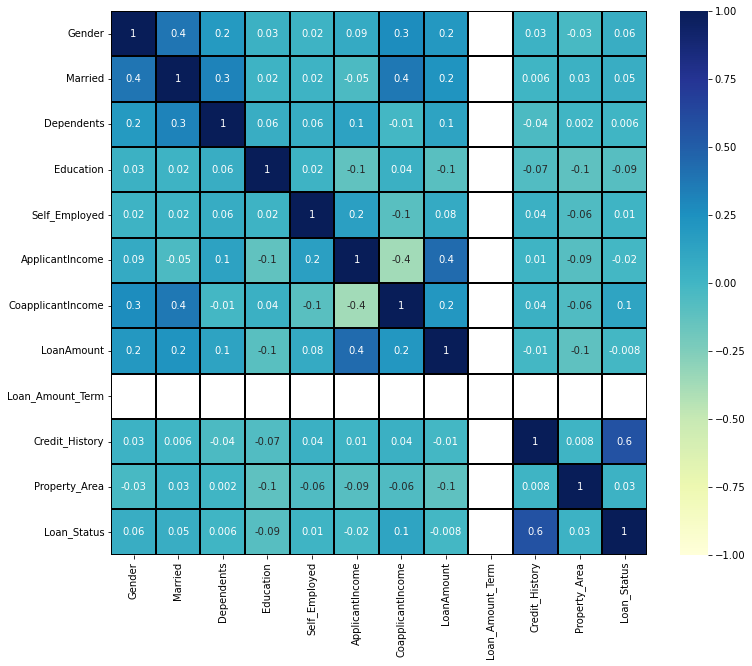

In [228]:
plt.figure(figsize=(12,10))
sns.heatmap(new_dataset.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [229]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.568638
CoapplicantIncome    0.119517
Gender               0.059532
Married              0.054912
Property_Area        0.030521
Self_Employed        0.011886
Dependents           0.006260
LoanAmount          -0.007916
ApplicantIncome     -0.015244
Education           -0.086611
Loan_Amount_Term          NaN
Name: Loan_Status, dtype: float64

In the above column we see the positive and negative correlation of target and features.

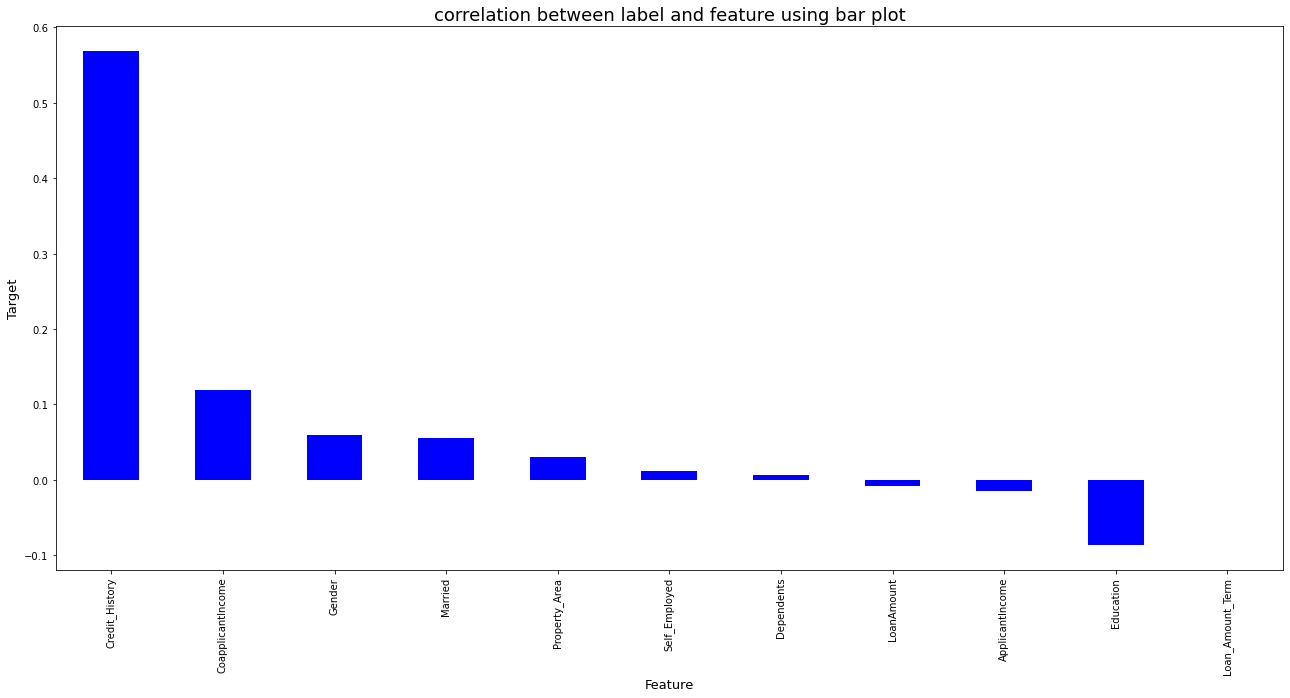

In [230]:
plt.figure(figsize=(22,10))
new_dataset.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=13)
plt.ylabel('Target',fontsize=13)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [231]:
x = new_dataset.drop("Loan_Status", axis=1)
y = new_dataset["Loan_Status"]

In [232]:
x.shape

(459, 11)

In [233]:
y.shape

(459,)

In [234]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.493865,-1.341186,-0.701874,-0.544619,-0.353553,1.039196,-1.159099,0.051225,0.0,0.398862,1.297803
1,0.493865,0.745609,0.320857,-0.544619,-0.353553,0.437965,0.725364,0.051225,0.0,0.398862,-1.258814
2,0.493865,0.745609,-0.701874,-0.544619,2.828427,-0.496672,-1.159099,-1.505642,0.0,0.398862,1.297803
3,0.493865,0.745609,-0.701874,1.836145,-0.353553,-0.796361,0.893359,-0.131315,0.0,0.398862,1.297803
4,0.493865,-1.341186,-0.701874,-0.544619,-0.353553,1.104901,-1.159099,0.339412,0.0,0.398862,1.297803
...,...,...,...,...,...,...,...,...,...,...,...
454,0.493865,0.745609,-0.701874,-0.544619,-0.353553,-0.341823,0.821006,-0.413488,0.0,0.398862,-1.258814
455,-2.024846,-1.341186,-0.701874,-0.544619,-0.353553,-0.565879,-1.159099,-1.364775,0.0,0.398862,-1.258814
456,0.493865,0.745609,0.320857,-0.544619,-0.353553,1.912240,0.111659,2.520193,0.0,0.398862,1.297803
457,0.493865,0.745609,1.343588,-0.544619,-0.353553,1.735438,-1.159099,1.290833,0.0,0.398862,1.297803


In [235]:
y.value_counts()

1    326
0    133
Name: Loan_Status, dtype: int64

In the above column we find the dataset is imblanced 

In [236]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x, y = sm.fit_resample(x,y)

In [237]:
y.value_counts()

1    326
0    326
Name: Loan_Status, dtype: int64

In the above dataset we have no balanced the data

In [238]:
new_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.039196,-1.159099,0.051225,360.0,1.0,2,1
1,1,1,1,0,0,0.437965,0.725364,0.051225,360.0,1.0,0,0
2,1,1,0,0,1,-0.496672,-1.159099,-1.505642,360.0,1.0,2,1
3,1,1,0,1,0,-0.796361,0.893359,-0.131315,360.0,1.0,2,1
4,1,0,0,0,0,1.104901,-1.159099,0.339412,360.0,1.0,2,1


In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC= RandomForestClassifier()
    RFC.fit(x_train, y_train)
    predRFC= RFC.predict(x_test)
    acc=accuracy_score(y_test, predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8928571428571429  on Random_state  172


The best accuracy is 89.28% on the Random state 172.

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=115)

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [263]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc =dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.7653061224489796
[[80 21]
 [25 70]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       101
           1       0.77      0.74      0.75        95

    accuracy                           0.77       196
   macro avg       0.77      0.76      0.76       196
weighted avg       0.77      0.77      0.77       196



The accuracy score for Decision Tree Classifier is 76.53%

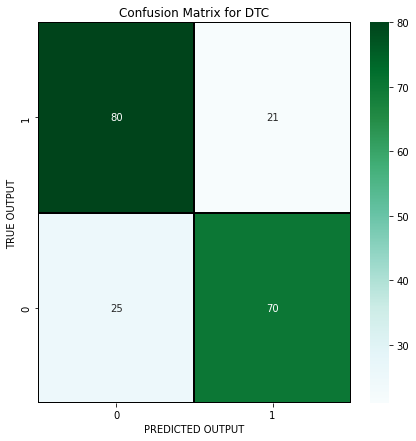

In [264]:
CM = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for DTC')
plt.show()

In [265]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8010204081632653
[[77 24]
 [15 80]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       101
           1       0.77      0.84      0.80        95

    accuracy                           0.80       196
   macro avg       0.80      0.80      0.80       196
weighted avg       0.80      0.80      0.80       196



The accuracy using Random Forest Classifier is 80.10%

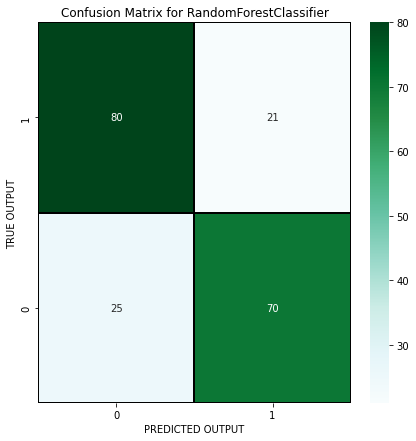

In [266]:
CM = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [267]:
lg= LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print("accuracy_score",accuracy_score(y_test,pred))
print("confusion_matrix",confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 1]
accuracy_score 0.75
confusion_matrix [[61 40]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       101
           1       0.68      0.91      0.78        95

    accuracy                           0.75       196
   macro avg       0.78      0.75      0.75       196
weighted avg       0.78      0.75      0.74       196



The accuracy using Logistic Regression is 75%

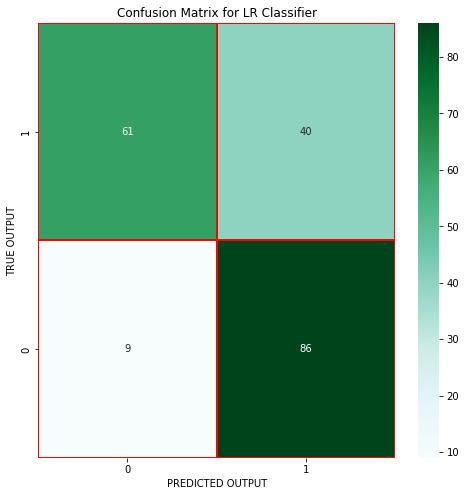

In [268]:
CM= confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="red", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for LR Classifier')
plt.show()

In [273]:
svc= SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7602040816326531
[[68 33]
 [14 81]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       101
           1       0.71      0.85      0.78        95

    accuracy                           0.76       196
   macro avg       0.77      0.76      0.76       196
weighted avg       0.77      0.76      0.76       196



The accuracy using SVC is 76.02%.

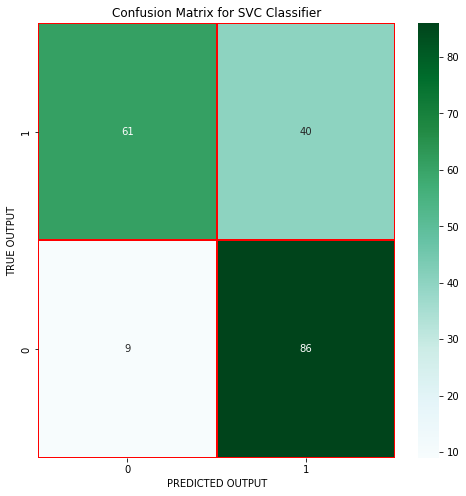

In [275]:
CM= confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="red", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [276]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7346938775510204
[[79 22]
 [30 65]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       101
           1       0.75      0.68      0.71        95

    accuracy                           0.73       196
   macro avg       0.74      0.73      0.73       196
weighted avg       0.74      0.73      0.73       196



The accuracy using KNeighbors Classifier is 73.46%

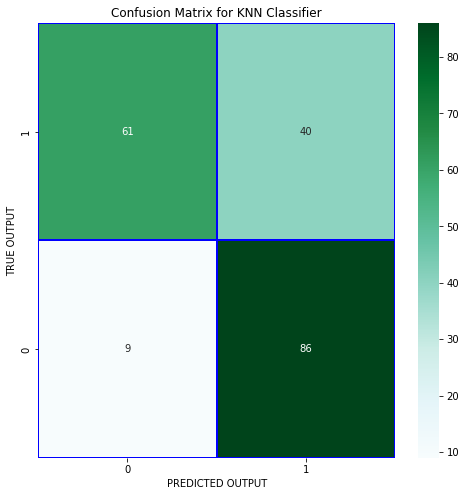

In [277]:
CM= confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [278]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.7653061224489796
[[73 28]
 [18 77]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       101
           1       0.73      0.81      0.77        95

    accuracy                           0.77       196
   macro avg       0.77      0.77      0.77       196
weighted avg       0.77      0.77      0.77       196



The accuracy using Gradient Boosting Classifier is 76.53%.

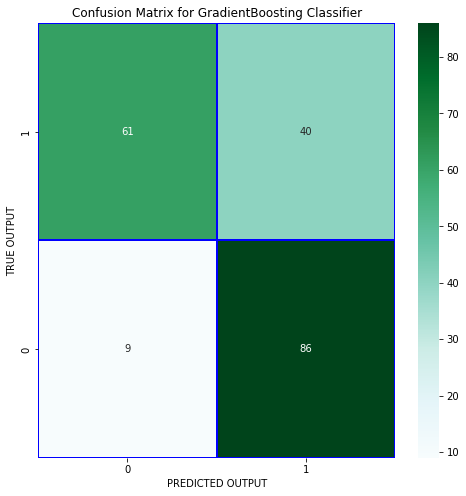

In [279]:
CM= confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show()

In [280]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.7448979591836735
[[70 31]
 [19 76]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       101
           1       0.71      0.80      0.75        95

    accuracy                           0.74       196
   macro avg       0.75      0.75      0.74       196
weighted avg       0.75      0.74      0.74       196



The accuracy using AdaBoost Classifier is 74.48%.

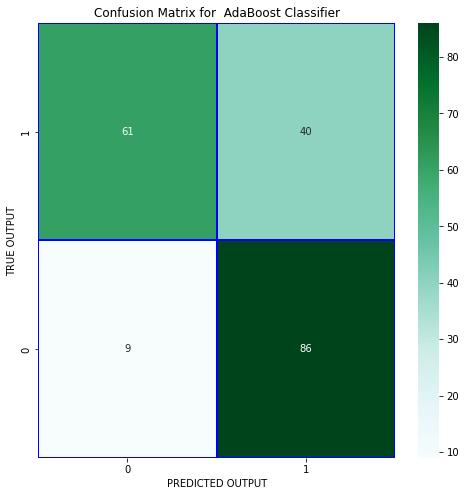

In [281]:

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [282]:
NB = GaussianNB()
NB.fit(x_train,y_train)
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.6938775510204082
[[43 58]
 [ 2 93]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.59       101
           1       0.62      0.98      0.76        95

    accuracy                           0.69       196
   macro avg       0.79      0.70      0.67       196
weighted avg       0.79      0.69      0.67       196



The accuracy using GaussianNB is 69.38%

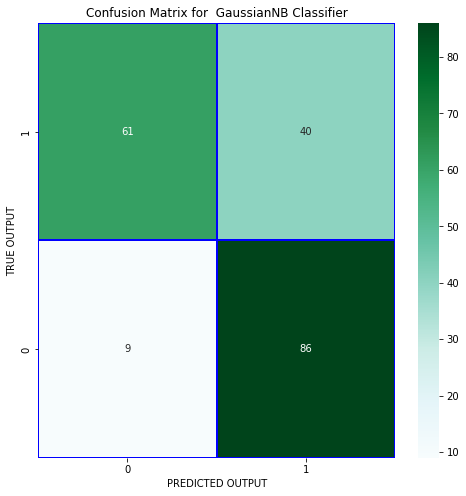

In [284]:
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title("Confusion Matrix for  GaussianNB Classifier")
plt.show()

In [286]:
from sklearn.model_selection import cross_val_score

In [288]:
print("dtc crossvalidation score",cross_val_score(dtc,x,y,cv=5).mean())
print("RFC crossvalidation score",cross_val_score(RFC,x,y,cv=5).mean())
print("Logistic Regression Classifier crossvalidationscore",cross_val_score(lg,x,y,cv=5).mean())
print("SVC crossvalidationscore",cross_val_score(svc,x,y,cv=5).mean())
print("KNN crossvalidationscore",cross_val_score(knn,x,y,cv=5).mean())
print("GB crossvalidationscore",cross_val_score(GB,x,y,cv=5).mean())
print("ABC crossvalidationscore",cross_val_score(ABC,x,y,cv=5).mean())
print("GaussianNB crossvalidationscore",cross_val_score(ABC,x,y,cv=5).mean())

dtc crossvalidation score 0.7976042278332355
RFC crossvalidation score 0.8513211978860834
Logistic Regression Classifier crossvalidationscore 0.7085378743394011
SVC crossvalidationscore 0.7438520258367587
KNN crossvalidationscore 0.7423018203170876
GB crossvalidationscore 0.8069406928948913
ABC crossvalidationscore 0.7516617733411627
GaussianNB crossvalidationscore 0.7532002348796242


From above the crossvalidation score we find that there is difference between the accuracy score and the cross validation score.

Further we can conclude that  KNeighbors Classifier as our best fitting model.

In [289]:
from sklearn.model_selection import GridSearchCV

In [290]:
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [291]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [292]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [293]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [294]:
Loan= KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.59183673469387


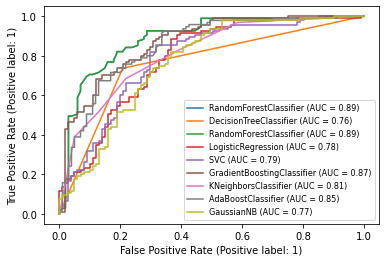

In [295]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(NB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

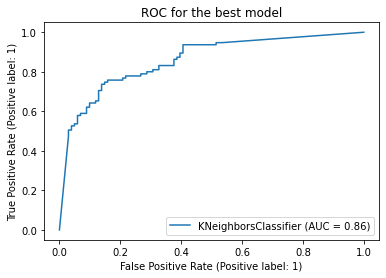

In [296]:
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()


In [297]:
import joblib
joblib.dump(Loan,"Loan_Model.obj")

['Loan_Model.obj']

In [298]:
model=joblib.load("Loan_Model.obj")

predict = model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])